# Practice defining models in Keras

In each of the tasks below, implement a model that replicates the architecture in the attached picture. When defining models, you can use both Sequential and Functional APIs.

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import numpy as np

## Exercise 1

Implement the model described below. Activate the last layer make "softmax".

<img src="https://drive.google.com/uc?export=view&id=1QCKcPlmguNNXPvUQnUaphcfOTWvQKzEW" width=200>
<img src="https://drive.google.com/uc?export=view&id=1r6DoTrn8Pe2RKuPT3RM9rR8Xc2X3WNVe" width=400>


Model: "InputLayer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 44        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 16)                144       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 279
Trainable params: 279
Non-trainable params: 0
_________________________________________________________________


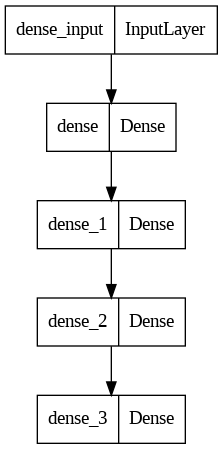

In [8]:
# <YOUR CODE STARTS HERE >
model = tf.keras.Sequential(name='InputLayer')
model.add(Dense(4, input_shape=(10,)))
model.add(Dense(8))
model.add(Dense(16))
model.add(Dense(3, activation='softmax'))

model.summary()
tf.keras.utils.plot_model(model, show_shapes=False)

In [7]:
output = model(np.ones((3, 10)))
assert np.allclose(output.numpy().sum(1),  np.ones(3)), "Did you forget softmax in the last layer?"
assert model.count_params() == 279, "Wrong params number"
print("Simple tests passed")

Simple tests passed


## Task 2

Implement the model described below.

<img src="https://lh3.googleusercontent.com/Aa_RCQNbksP9j27Br0kbq-Aj_yWHW3fofmaZj6jOm8xBLgWrEn60MbxVBkfZipLJ5mI3LAMC9wdhv08i76oKY6cQzUdYVHyRzLV4dZ8Yw-TIC6Y82gLe1zmdwzpX2JkFmo-nJy6YPLGiZuqkjKJlTdtHdFdDuIp_akK2fSMEMf85u3_3N-Gx6XSTxaQsCX5PL8aWlNeDl5rpHhmQYBTe1TR2-EDsAMgz4CLBMwyhVPJwjBR57WOBw14NPp6RrayuaPSltd9qbvQG2236WKqyL0w__y6tR6Vg7WMtUm4SKrPbTSUUyEEvU1hH6Z6yQpgyRRXecdupmTyx3FySqgERRVIqEb-JNoLppqzcaBEHDKdi0I7tQuuKXVyjSq5P02McLEwR7ej3dKVC8R3EsFDZV8uVLWJQSdpvInhp5d0fGb5u-UOfRuJ1X_4s2A6BJPbWbj4NyQAWPFem02A2Ya4CpzgDbMnjiAmlt_-JavcPCi7UALu6mH_RzPgNkzlrSqEMHpdBnVs6vhtEQGoZU1kxARvZxfBnbXTudg0IYjZ-LBKEfEFRwN3pbC3A9xnPS_-LRXcvAy45VSgH_JgPV4PpBFwo-xVg6O1RUhbOBuR8_a9OOyLd2zN8NaLO4e4bxq8pHD9mIXXBrxxCK76pjO5Vs2m03h-U7o6VTci3Fr9U5f2rF4ejP_7pNtSwfZ3RRA=w646-h220-no?authuser=0" width=400>
<img src="https://drive.google.com/uc?export=view&id=1vR3XfyYEpSmgEXZoLGY_FfWRwgOiefoj" width=300>


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputLayer (InputLayer)        [(None, 10)]         0           []                               
                                                                                                  
 Layer1 (Dense)                 (None, 10)           110         ['InputLayer[0][0]']             
                                                                                                  
 SumLayer (Add)                 (None, 10)           0           ['InputLayer[0][0]',             
                                                                  'Layer1[0][0]']                 
                                                                                                  
Total params: 110
Trainable params: 110
Non-trainable params: 0
____________________________

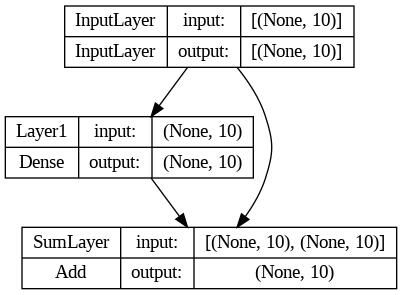

In [9]:
# <YOUR CODE STARTS HERE >
input_layer = tf.keras.layers.Input(shape=(10,), name='InputLayer')
l1_output = Dense(10, name='Layer1')(input_layer)

sum_output = tf.keras.layers.Add(name='SumLayer')([input_layer, l1_output])

model = tf.keras.Model(inputs=input_layer, outputs=sum_output)

model.summary()
assert model.count_params() == 110, "Wrong params number"
print("Simple tests passed")
tf.keras.utils.plot_model(model, show_shapes=True)

## Task 3

Implement the model described below. You will need tf.keras.layers.Concatenate.

<img src="https://drive.google.com/uc?export=view&id=1LvsTd2a0HW-duuv3UyxCBLmERpqQQweU" width=450>
<img src="https://drive.google.com/uc?export=view&id=18IMatPWKG-0T9gisyJ_k465mospO_xow" width=400>


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputLayer (InputLayer)        [(None, 10)]         0           []                               
                                                                                                  
 Layer1 (Dense)                 (None, 10)           110         ['InputLayer[0][0]']             
                                                                                                  
 Layer2 (Dense)                 (None, 10)           110         ['InputLayer[0][0]']             
                                                                                                  
 Layer3 (Dense)                 (None, 10)           110         ['Layer1[0][0]']                 
                                                                                            

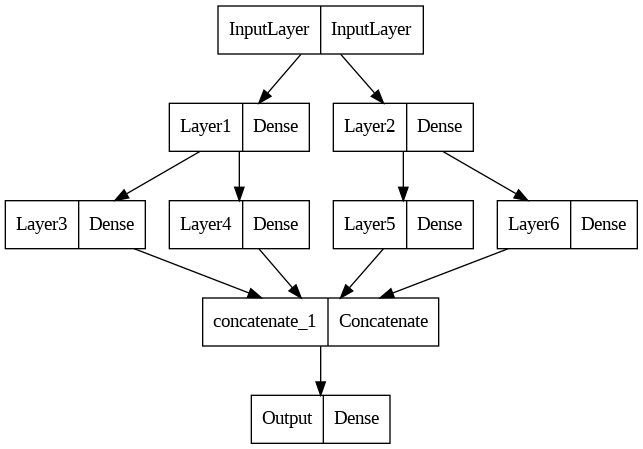

In [10]:
from os import name
from typing_extensions import Concatenate
# <YOUR CODE STARTS HERE >

input_layer_2 = tf.keras.layers.Input(10, name='InputLayer')
layer1_output = Dense(10, name='Layer1')(input_layer_2)
layer2_output = Dense(10, name='Layer2')(input_layer_2)
layer3_output = Dense(10, name='Layer3')(layer1_output)
layer4_output = Dense(10, name='Layer4')(layer1_output)
layer5_output = Dense(10, name='Layer5')(layer2_output)
layer6_output = Dense(10, name='Layer6')(layer2_output)

concat_out = tf.keras.layers.concatenate([layer3_output, layer4_output, 
                                          layer5_output, layer6_output])
output_layer = Dense(3, name='Output')(concat_out)

model = tf.keras.Model(inputs=input_layer_2, outputs=output_layer)

model.summary()
assert model.count_params() == 783, "Wrong params number"
print("Simple tests passed")
tf.keras.utils.plot_model(model, show_shapes=False)